Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
loaded
NPZ list ready
24 turns in total 
['img_data', 'img_labels']
('Current npz', 1)
The 1 turn is finished
['img_data', 'img_labels']
('Current npz', 2)
The 2 turn is finished
['img_data', 'img_labels']
('Current npz', 3)
The 3 turn is finished
['img_data', 'img_labels']
('Current npz', 4)
The 4 turn is finished
['img_data', 'img_labels']
('Current npz', 5)
The 5 turn is finished
['img_data', 'img_labels']
('Current npz', 6)
The 6 turn is finished
['img_data', 'img_labels']
('Current npz', 7)
The 7 turn is finished
['img_data', 'img_labels']
('Current npz', 8)
The 8 turn is finished
['img_data', 'img_labels']
('Current npz', 9)
The 9 turn is finished
['img_data', 'img_labels']
('Current npz', 10)
The 10 turn is finished
['img_data', 'img_labels']
('Cur

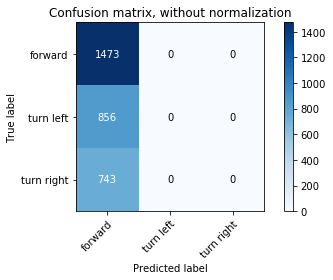

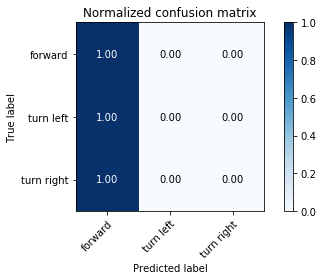

In [1]:
%matplotlib inline
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import glob
import dataset_load
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from keras.models import load_model

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def model_evl():
    class_names=['forward','turn left', 'turn right']
    model_loaded = glob.glob('./*.h5')  
#     for single_mod in model_loaded:
#         model=load_model(single_mod)
    model = load_model('./model-013.h5')
#     model = load_model('./model-005.h5')
    print('loaded')   
        
    X_test,y_test=dataset_load.data_load('./test_set')
    
    print('X_test shape'+str(X_test.shape))
    print('y_test shape'+str(y_test.shape))

    predict=model.predict(X_test)
    print('predicted_test shape'+str(predict.shape))
    y_pred=np.argmax(predict,axis=1)
    print('predicted number shape'+str(y_pred.shape))
    y_test_index=np.argmax(y_test,axis=1)
    print('actual number shape'+str(y_test_index.shape))
    
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(y_test_index, y_pred, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plot_confusion_matrix(y_test_index, y_pred, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()
    
if __name__=='__main__':
    model_evl()